# Comparing Sequential and Functional Neural Networks in Keras
Using the UCI Combined Cycle Power Plant dataset, we predict Net hourly electrical energy output (PE) and Exhaust Vacuum (V) with Temperature (T), Ambient Pressure (AP) and Relative Humidity (RH) as inputs.

In [4]:
##import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
##import the dataset 

df = pd.read_excel('Folds5x2_pp.xlsx')

df.head()

##define a function to get the outputs of the model

def get_outputs(data):

    y1 = data.pop('PE')

    y1 = np.array(y1)

    y2 = data.pop('V')

    y2 = np.array(y2)

    return y1, y2
# Split the data into train and test with 80 train / 20 test

train, test = train_test_split(df, test_size=0.2, random_state = 1)




##getting the outputs(PE) and (V) of the train and test data 

y_train = get_outputs(train)

y_test = get_outputs(test)

###Scaling the inputs

min_max=MinMaxScaler()

X_train=min_max.fit_transform(train)

X_test=min_max.transform(test)


Building the neural network

(Here we are using 2 hidden layers and one branched layer with 10 neurons each)


In [5]:

##Import the libraries for neural networks

from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input

from tensorflow.keras.layers import Dense


##define input layer

input_layer = Input(shape=(3,),name='input_layer')

##Defining 2 hidden layers

Layer_1 = Dense(10, activation="relu",name='Layer_1')(input_layer)

Layer_2 = Dense(10, activation="relu",name='Layer_2')(Layer_1)

##Defining  output layer y1

y1_output= Dense(1, activation="linear",name='y1_output')(Layer_2)

##Defining Branched layer

Branched_layer=Dense(10, activation="relu",name='Branched_layer')(Layer_2)

##Defining 2nd output layer y2

y2_output= Dense(1, activation="linear",name='y2_output')(Branched_layer)

##Defining the model by specifying the input and output layers

model = Model(inputs=input_layer,outputs=[y1_output,y2_output])
##summary of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_layer (InputLayer)       [(None, 3)]          0           []                               
                                                                                                  
 Layer_1 (Dense)                (None, 10)           40          ['input_layer[0][0]']            
                                                                                                  
 Layer_2 (Dense)                (None, 10)           110         ['Layer_1[0][0]']                
                                                                                                  
 Branched_layer (Dense)         (None, 10)           110         ['Layer_2[0][0]']                
                                                                                            

In [6]:
## defining the optimizer and loss function

model.compile(optimizer='adam',

              loss={'y1_output':'mse','y2_output':'mse'})

##training the model

model.fit(X_train,y_train)

240/240 [==============================] - 4s 4ms/step - loss: 202911.0938 - y1_output_loss: 200781.8906 - y2_output_loss: 2129.2529


Now let’s predict energy output and exhaust vacuum on the test data and check the performance

60/60 [==============================] - 0s 3ms/step


Text(0, 0.5, 'predicted energy output')

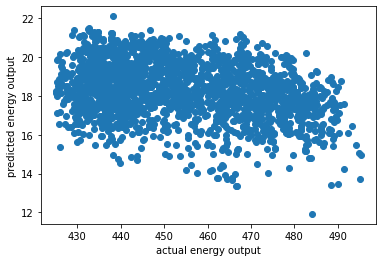

In [7]:
##model predictions

predictions = model.predict(X_test)

predicted_energy=predictions[0]

predicted_vacuum=predictions[1]
##Plotting actual vs predicted energy

plt.scatter(y_test[0],predicted_energy)

plt.xlabel('actual energy output')

plt.ylabel('predicted energy output')

Text(0, 0.5, 'predicted exhaust vacuum')

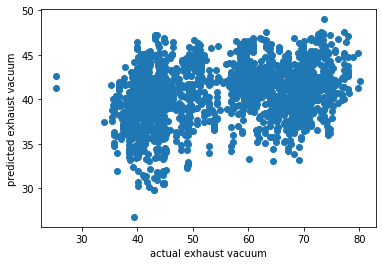

In [8]:
##Plotting actual vs predicted exhaust vacuum

plt.scatter(y_test[1],predicted_vacuum)

plt.xlabel('actual exhaust vacuum')

plt.ylabel('predicted exhaust vacuum')

In [13]:
# Checking r2 score (coefficient of determination):
from sklearn.metrics import r2_score


print('r2 score for energy predicted :', r2_score(y_test[0],predicted_energy))

print('r2 score forexhaust vacuum predicted :', r2_score(y_test[1],predicted_vacuum))


r2 score for energy predicted : -634.4415878044493
r2 score forexhaust vacuum predicted : -1.063497369825456
